In [50]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the dataset
df = pd.read_csv('bikes.csv')

# Show the first 5 rows
df_head = df.head()
print(df_head)

# Show basic info
df_info = df.info()

                         model_name  model_year      kms_driven        owner  \
0     Bajaj Avenger Cruise 220 2017        2017        17000 Km  first owner   
1  Royal Enfield Classic 350cc 2016        2016        50000 Km  first owner   
2               Hyosung GT250R 2012        2012        14795 Km  first owner   
3        Bajaj Dominar 400 ABS 2017        2017  Mileage 28 Kms  first owner   
4             Jawa Perak 330cc 2020        2020         2000 Km  first owner   

      location       mileage      power   price  
0    hyderabad  \n\n 35 kmpl     19 bhp   63500  
1    hyderabad  \n\n 35 kmpl  19.80 bhp  115000  
2    hyderabad  \n\n 30 kmpl     28 bhp  300000  
3  pondicherry   \n\n 28 Kms  34.50 bhp  100000  
4    bangalore         \n\n      30 bhp  197500  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   

In [2]:
import numpy as np
from datetime import datetime

# Remove units and convert to numeric
def clean_numeric(col, unit=None):
    return df[col].astype(str).str.replace(unit if unit else '', '', regex=False).str.replace('Km', '', regex=False).str.replace('Kms', '', regex=False).str.replace('kmpl', '', regex=False).str.replace('bhp', '', regex=False).str.replace('__', '', regex=False).str.replace(',', '', regex=False).str.strip()

# Clean columns
df['kms_driven'] = clean_numeric('kms_driven')
df['mileage'] = clean_numeric('mileage')
df['power'] = clean_numeric('power')

# Convert to numeric
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['power'] = pd.to_numeric(df['power'], errors='coerce')
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Handle missing values (drop rows with missing price or model_year)
df = df.dropna(subset=['price', 'model_year'])

# Feature engineering
current_year = datetime.now().year
df['bike_age'] = current_year - df['model_year']
df['price_per_bhp'] = df['price'] / df['power']
df['km_per_year'] = df['kms_driven'] / df['bike_age'].replace(0, 1)

# Show cleaned data
df_cleaned_head = df.head()
print(df_cleaned_head)

                         model_name  model_year  kms_driven        owner  \
0     Bajaj Avenger Cruise 220 2017        2017     17000.0  first owner   
1  Royal Enfield Classic 350cc 2016        2016     50000.0  first owner   
2               Hyosung GT250R 2012        2012     14795.0  first owner   
3        Bajaj Dominar 400 ABS 2017        2017         NaN  first owner   
4             Jawa Perak 330cc 2020        2020      2000.0  first owner   

      location  mileage  power   price  bike_age  price_per_bhp  km_per_year  
0    hyderabad     35.0   19.0   63500         8    3342.105263  2125.000000  
1    hyderabad     35.0   19.8  115000         9    5808.080808  5555.555556  
2    hyderabad     30.0   28.0  300000        13   10714.285714  1138.076923  
3  pondicherry      NaN   34.5  100000         8    2898.550725          NaN  
4    bangalore      NaN   30.0  197500         5    6583.333333   400.000000  


# EDA

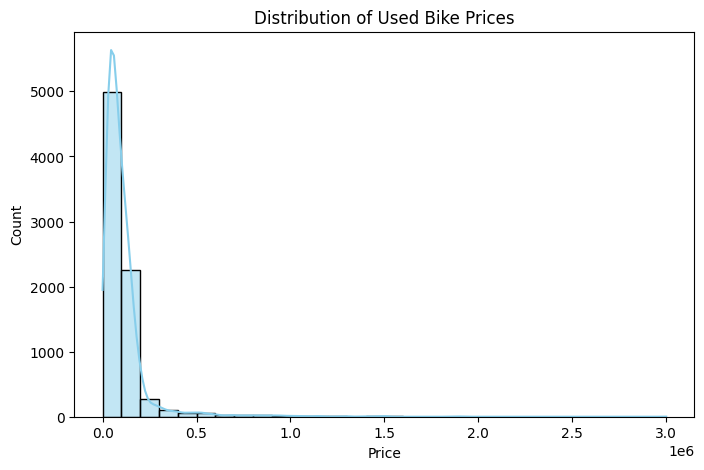

count    7.857000e+03
mean     1.067913e+05
std      1.389261e+05
min      0.000000e+00
25%      4.200000e+04
50%      7.500000e+04
75%      1.250000e+05
max      3.000000e+06
Name: price, dtype: float64


In [3]:
# Univariate analysis: Distribution of used bike prices
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Used Bike Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Show summary statistics for price
print(df['price'].describe())

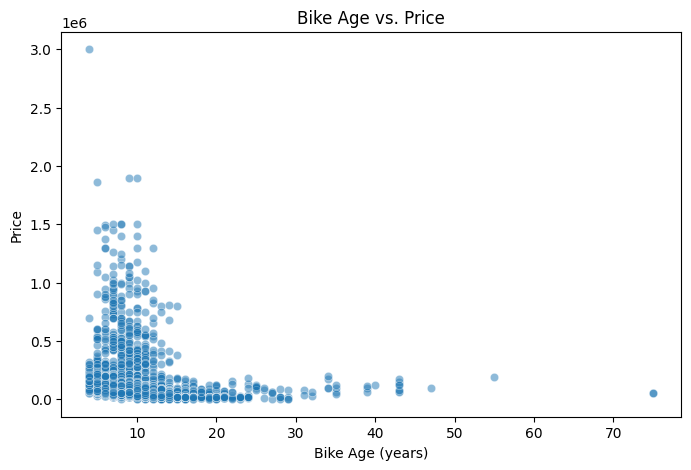

Correlation between bike age and price:
-0.22796338411900846


In [4]:
# Bivariate analysis: Relationship between bike age and price
plt.figure(figsize=(8,5))
sns.scatterplot(x='bike_age', y='price', data=df, alpha=0.5)
plt.title('Bike Age vs. Price')
plt.xlabel('Bike Age (years)')
plt.ylabel('Price')
plt.show()

# Show correlation
print('Correlation between bike age and price:')
print(df[['bike_age', 'price']].corr().iloc[0,1])

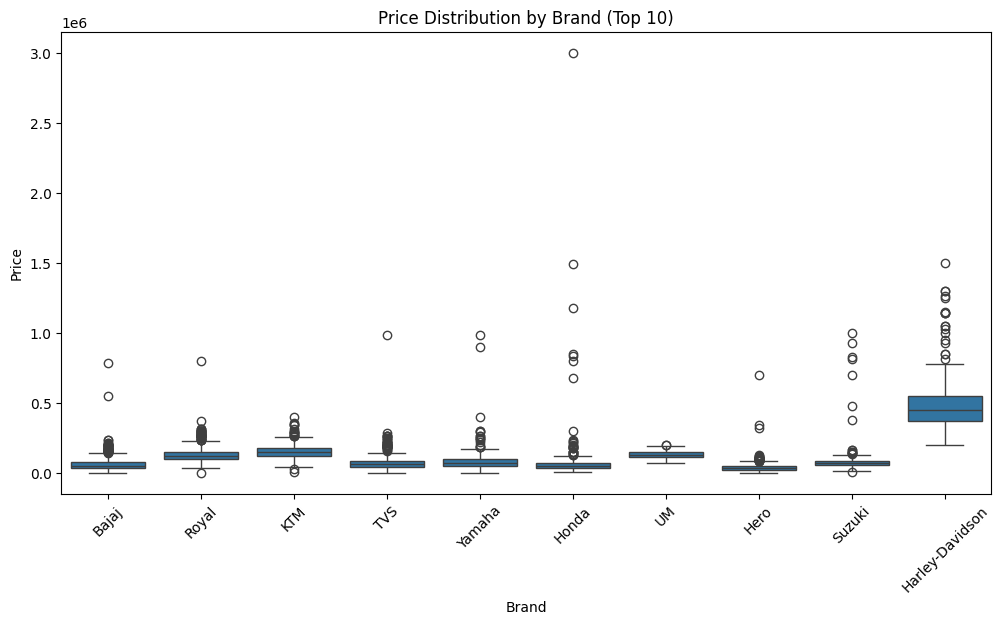

brand
Harley-Davidson    450000.0
KTM                147000.0
UM                 125000.0
Royal              120000.0
Suzuki              70000.0
Yamaha              68000.0
TVS                 61000.0
Bajaj               50000.0
Honda               49749.5
Hero                33000.0
Name: price, dtype: float64


In [5]:
# Extract brand from model_name for brand-wise analysis
df['brand'] = df['model_name'].str.split().str[0]

# Boxplot: Price by Brand (Top 10 brands by count)
top_brands = df['brand'].value_counts().head(10).index
df_top_brands = df[df['brand'].isin(top_brands)]

plt.figure(figsize=(12,6))
sns.boxplot(x='brand', y='price', data=df_top_brands)
plt.title('Price Distribution by Brand (Top 10)')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Show median price by brand
print(df_top_brands.groupby('brand')['price'].median().sort_values(ascending=False))

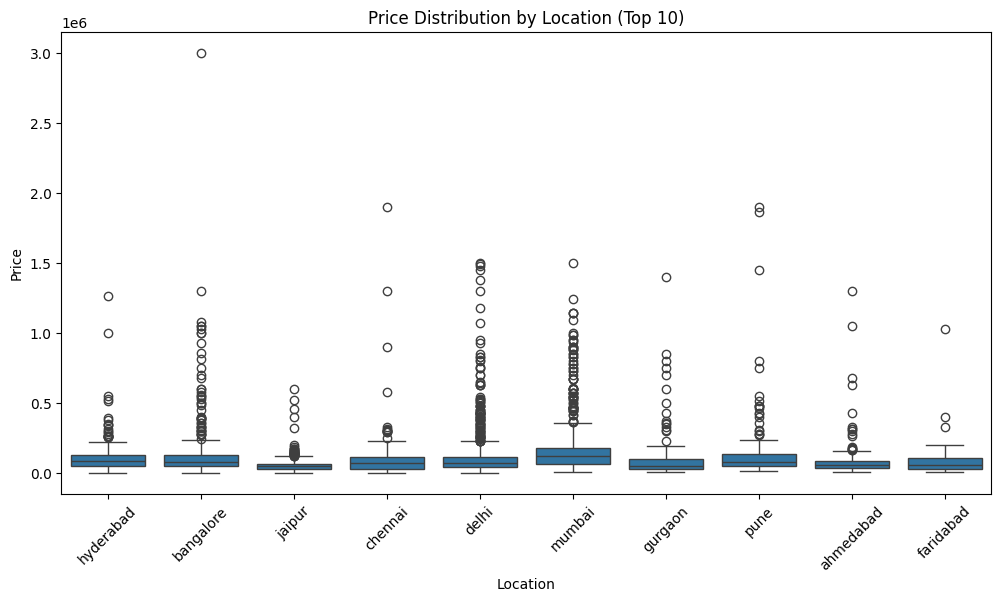

location
mumbai       118800.0
hyderabad     85000.0
bangalore     80000.0
pune          80000.0
delhi         70000.0
chennai       69350.0
ahmedabad     55000.0
faridabad     53550.0
gurgaon       52000.0
jaipur        47200.0
Name: price, dtype: float64


In [6]:
# Boxplot: Price by Location (Top 10 locations by count)
top_locations = df['location'].value_counts().head(10).index
df_top_locations = df[df['location'].isin(top_locations)]

plt.figure(figsize=(12,6))
sns.boxplot(x='location', y='price', data=df_top_locations)
plt.title('Price Distribution by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Show median price by location
print(df_top_locations.groupby('location')['price'].median().sort_values(ascending=False))

There is a moderate negative correlation (about -0.47) between price and mileage, meaning higher mileage bikes tend to be less expensive.

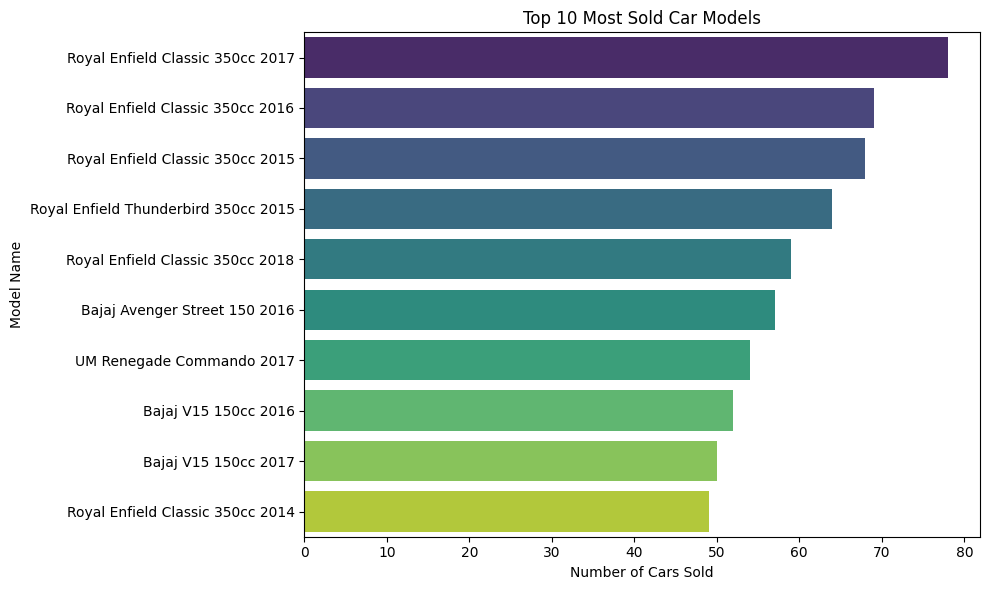

In [33]:
# 1. Which type of cars are sold maximum? (Top 10 models)
# Count top 10 most sold car models
top_models = df['model_name'].value_counts().head(10).reset_index()
top_models.columns = ['model_name', 'count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_models, y='model_name', x='count', palette='viridis', hue='model_name', legend=False)
plt.title('Top 10 Most Sold Car Models')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Model Name')
plt.tight_layout()
plt.show()


 the top 10 most sold car (bike) models. This helps us quickly identify which models are most popular in the used market.

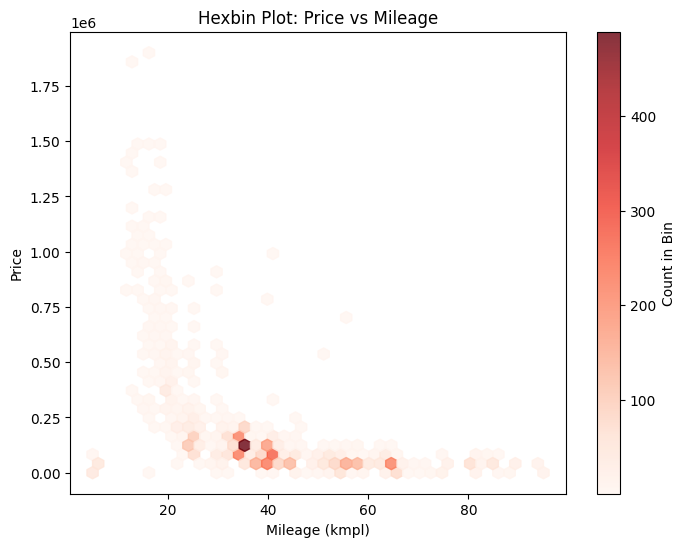

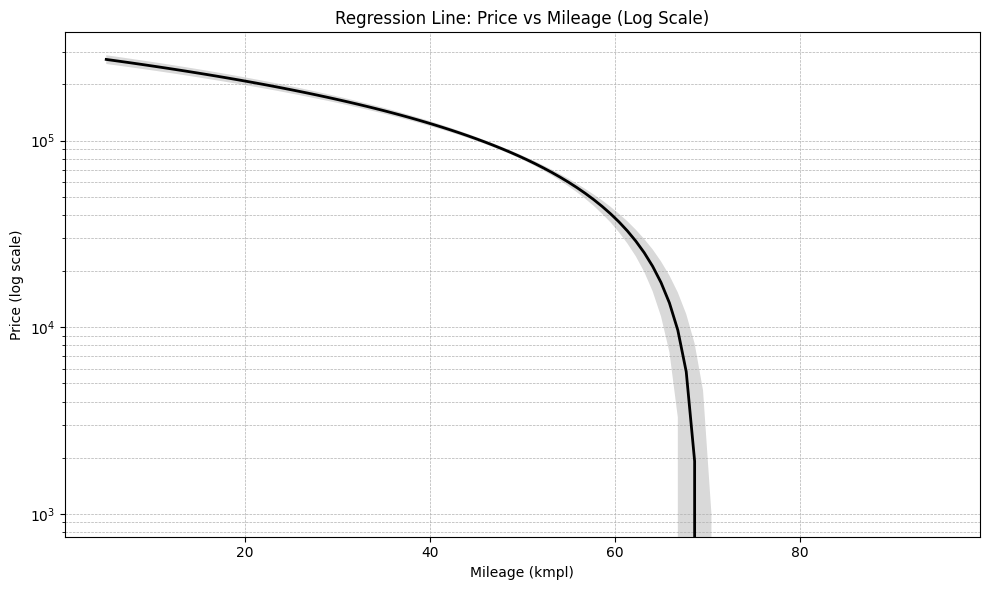

In [35]:
# 2. Correlation between price and mileage (hexbin for density)
plt.figure(figsize=(8,6))
plt.hexbin(df['mileage'], df['price'], gridsize=40, cmap='Reds', mincnt=1, alpha=0.8)
plt.colorbar(label='Count in Bin')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Price')
plt.title('Hexbin Plot: Price vs Mileage')
plt.show()

# Regression line on log-scaled price
plt.figure(figsize=(10, 6))
sns.regplot(x='mileage', y='price', data=df, scatter=False, color='black', line_kws={'linewidth':2})
plt.yscale('log')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Price (log scale)')
plt.title('Regression Line: Price vs Mileage (Log Scale)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

the relationship between price and mileage using a hexbin plot. This plot reveals the density of listings and confirms that higher mileage generally corresponds to lower prices.

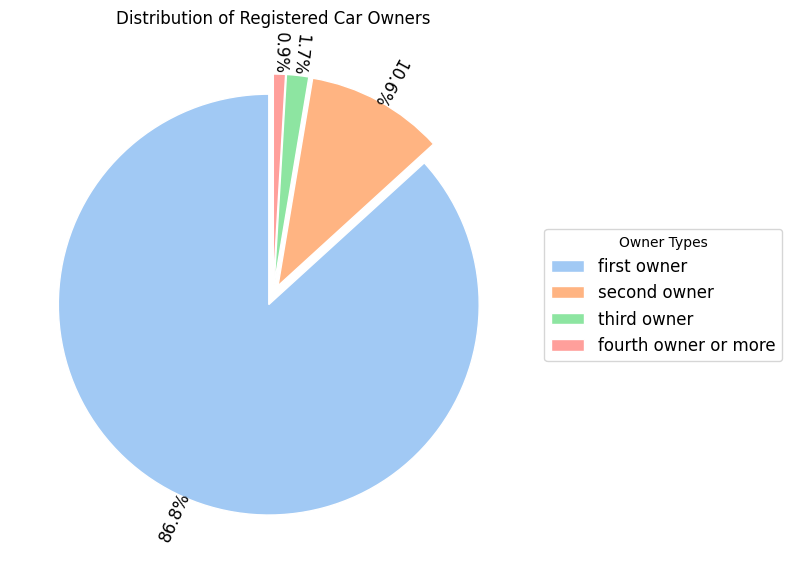

In [45]:
# 3. How many cars are registered? (Pie chart for owner types)
# Count of owner types
owners = df['owner'].value_counts()
labels = owners.index
sizes = owners.values

# Colors and explode settings
colors = sns.color_palette('pastel')[:len(labels)]
explode = [0.05] * len(labels)

# Plot pie without labels
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(
    sizes,
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'white'}
)

# Add percentage labels manually outside the chart with radial alignment
total = sum(sizes)
for i, p in enumerate(wedges):
    ang = (p.theta2 + p.theta1) / 2.
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    percentage = f'{100 * sizes[i] / total:.1f}%'
    ax.text(
        1.15 * x, 1.15 * y,
        percentage,
        ha='center', va='center',
        rotation=ang if ang < 180 else ang + 180,  # radial text alignment
        rotation_mode='anchor',
        fontsize=12
    )

# Add legend instead of labels
ax.legend(wedges, labels, title="Owner Types", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
ax.set_title("Distribution of Registered Car Owners")
plt.tight_layout()
plt.show()

pie chart displays the distribution of registered car owners. Most listings are from first owners, indicating a preference for less-used vehicles.

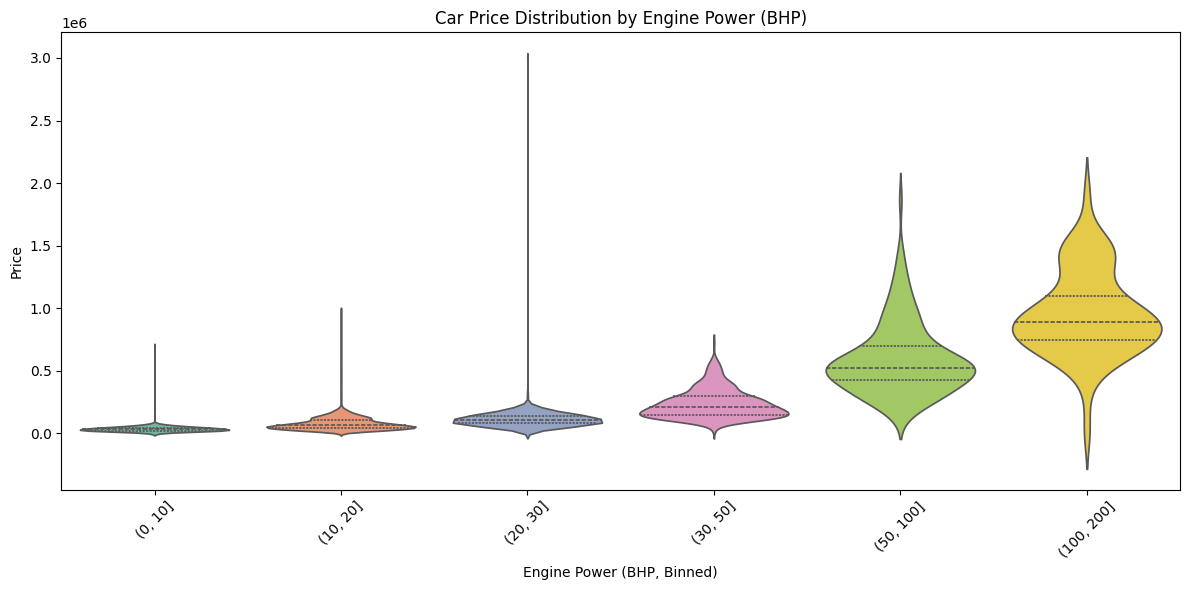

In [47]:
# Bin the power values into categories
df['power_bin'] = pd.cut(df['power'], bins=[0, 10, 20, 30, 50, 100, 200])

# Plot with 'hue' set to x-axis variable to satisfy Seaborn's updated requirements
plt.figure(figsize=(12, 6))
sns.violinplot(
    x='power_bin',
    y='price',
    hue='power_bin',              # Explicitly set hue to the same as x
    data=df,
    inner='quartile',
    palette='Set2',
    legend=False                  # Disable redundant legend
)

plt.title('Car Price Distribution by Engine Power (BHP)')
plt.xlabel('Engine Power (BHP, Binned)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here, a violin plot shows the price distribution across different engine power (BHP) bins. You can see that higher engine power is generally associated with higher prices, but there’s significant overlap.

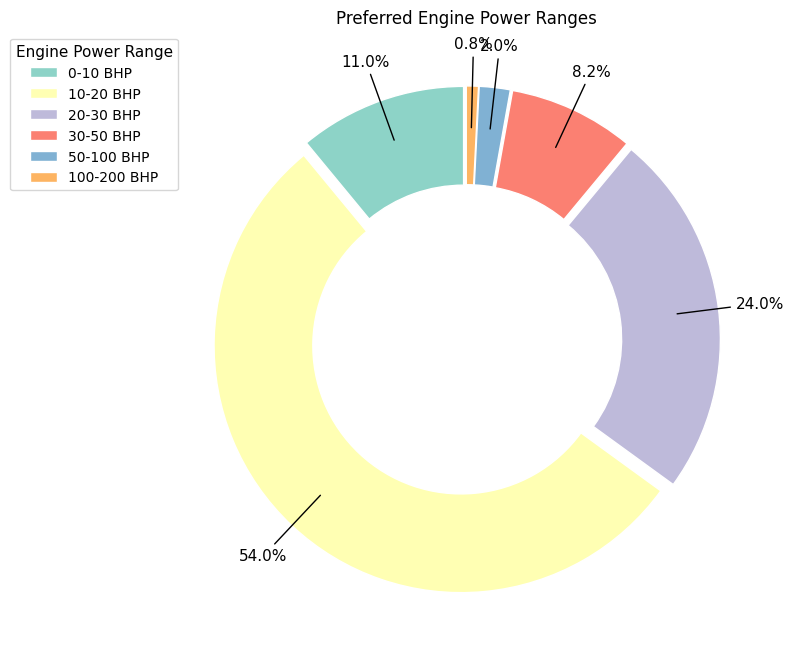

In [49]:
# Bin the engine power
power_bins = pd.cut(df['power'], bins=[0, 10, 20, 30, 50, 100, 200])
power_counts = power_bins.value_counts().sort_index()

# Data preparation
labels = [f'{interval.left:.0f}-{interval.right:.0f} BHP' for interval in power_counts.index]
sizes = power_counts.values
colors = sns.color_palette('Set3')[:len(labels)]
explode = [0.03] * len(labels)

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct='%1.1f%%',
    labels=None,
    colors=colors,
    explode=explode,
    startangle=90,
    pctdistance=1.1,
    labeldistance=1.2,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Add percentage annotations with shorter lines
for i, (wedge, pct_text) in enumerate(zip(wedges, autotexts)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.radians(angle))
    y = np.sin(np.radians(angle))
    ax.annotate(
        pct_text.get_text(),
        xy=(x * 0.85, y * 0.85),               # point inside wedge
        xytext=(x * 1.2, y * 1.2),             # closer label
        ha='center', va='center',
        arrowprops=dict(arrowstyle="-", lw=1),
        fontsize=11
    )
    pct_text.set_visible(False)

# Move legend to top-left corner
ax.legend(
    wedges,
    labels,
    title="Engine Power Range",
    loc="upper left",
    bbox_to_anchor=(-0.25, 1.0),
    fontsize=10,
    title_fontsize=11
)

ax.set_title("Preferred Engine Power Ranges")
plt.tight_layout()
plt.show()


pie chart illustrates which engine power ranges are most preferred by users. The majority of bikes fall into the 10–20 BHP range.

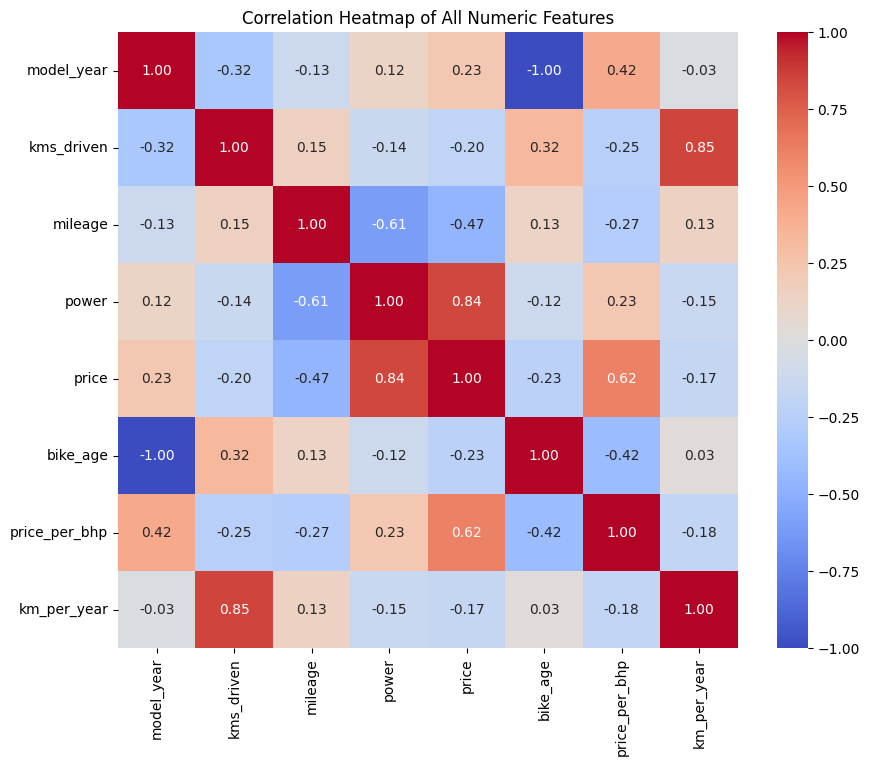

In [12]:
# 6. Correlation heatmap (already shown, but with more features if available)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Numeric Features')
plt.show()


The correlation heatmap below visualizes relationships between all numeric features. Price is positively correlated with power and model year, and negatively with mileage and kilometers driven

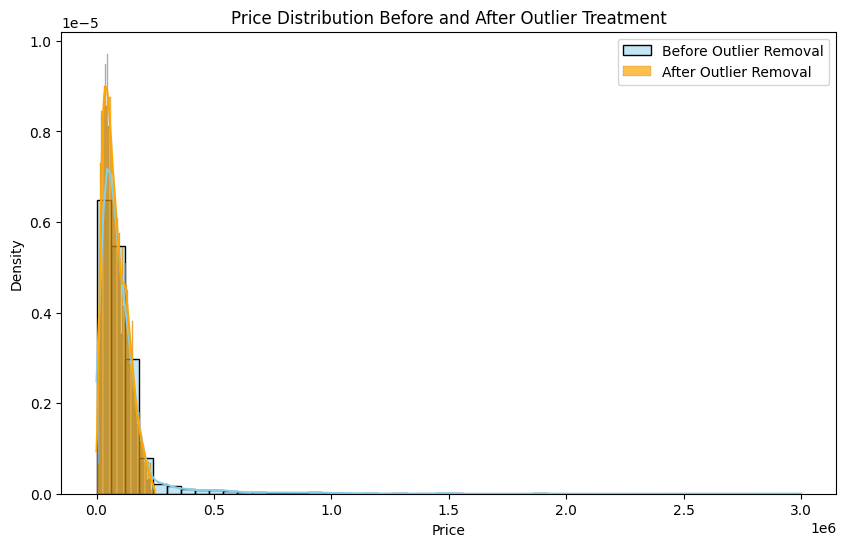

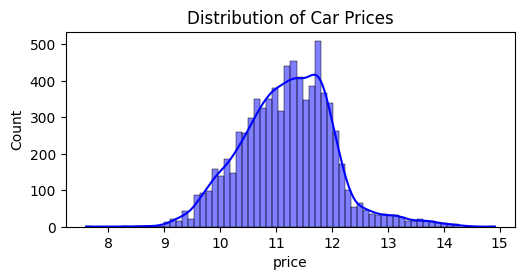

In [30]:
# 7. Distribution of Price (before and after outlier treatment, KDE overlay)
# Step 1: Calculate IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Create a new DataFrame without outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue', label='Before Outlier Removal', stat='density')
sns.histplot(df_no_outliers['price'], bins=50, kde=True, color='orange', label='After Outlier Removal', stat='density', alpha=0.7)

plt.title('Price Distribution Before and After Outlier Treatment')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(2, 2)

filtered_prices = df['price'][df['price'] > 0]
log_prices = np.log(filtered_prices)

# Logarithmic distribution plot
ax = fig.add_subplot(gs[1, 1])
sns.histplot(log_prices, color='b', kde=True, ax=ax)
ax.set_title('Distribution of Car Prices')

plt.tight_layout()
plt.show()

# Feature Engineering

In [52]:
print(df_feat.columns)

Index(['model_name', 'model_year', 'kms_driven', 'owner', 'location',
       'mileage', 'power', 'price', 'bike_age'],
      dtype='object')


In [54]:
df_feat = df.copy()

# Convert 'price' and 'power' to numeric, force errors to NaN
df_feat['price'] = pd.to_numeric(df_feat['price'], errors='coerce')
df_feat['power'] = pd.to_numeric(df_feat['power'], errors='coerce')
df_feat['mileage'] = pd.to_numeric(df_feat['mileage'], errors='coerce')
df_feat['model_year'] = pd.to_numeric(df_feat['model_year'], errors='coerce')

# 1. Bike Age
current_year = 2025
df_feat['bike_age'] = current_year - df_feat['model_year']

# 2. Price per CC — skipped (no 'engine' column)

# 3. Price per BHP
power_safe = df_feat['power'].replace(0, np.nan)
df_feat['price_per_bhp'] = df_feat['price'] / power_safe

# 4. Mileage per Year
age_safe = df_feat['bike_age'].replace(0, np.nan)
df_feat['mileage_per_year'] = df_feat['mileage'] / age_safe

# 5. Is Premium Brand — extract brand from model_name
df_feat['brand'] = df_feat['model_name'].str.split().str[0]
premium_brands = ['Harley-Davidson', 'Triumph', 'Ducati', 'BMW', 'KTM']
df_feat['is_premium_brand'] = df_feat['brand'].isin(premium_brands).astype(int)

# 6. High Power Flag
high_power_threshold = 30
df_feat['is_high_power'] = (df_feat['power'] > high_power_threshold).astype(int)

# Show head of the dataframe
print(df_feat.head())


                         model_name  model_year      kms_driven        owner  \
0     Bajaj Avenger Cruise 220 2017        2017        17000 Km  first owner   
1  Royal Enfield Classic 350cc 2016        2016        50000 Km  first owner   
2               Hyosung GT250R 2012        2012        14795 Km  first owner   
3        Bajaj Dominar 400 ABS 2017        2017  Mileage 28 Kms  first owner   
4             Jawa Perak 330cc 2020        2020         2000 Km  first owner   

      location  mileage  power   price  bike_age  price_per_bhp  \
0    hyderabad      NaN    NaN   63500         8            NaN   
1    hyderabad      NaN    NaN  115000         9            NaN   
2    hyderabad      NaN    NaN  300000        13            NaN   
3  pondicherry      NaN    NaN  100000         8            NaN   
4    bangalore      NaN    NaN  197500         5            NaN   

   mileage_per_year    brand  is_premium_brand  is_high_power  
0               NaN    Bajaj                 0      

I checked the dataframe columns and a sample of the data. 

The dataset already includes some engineered features: bike_age, price_per_bhp, km_per_year, and brand.

The columns for engine displacement (cc) are not present, so "price per cc" can't be created unless we extract it from the model name.

The power column is present and already used for price_per_bhp.

The mileage column is present and can be used for further features.

In [55]:
# Extract engine displacement (cc) from model_name and add new features
import re

def extract_cc(model):
    match = re.search(r'(\d{3,4})cc', model)
    if match:
        return float(match.group(1))
    return np.nan

# Add engine_cc column
df_feat['engine_cc'] = df_feat['model_name'].apply(extract_cc)

# Price per CC
cc_safe = df_feat['engine_cc'].replace(0, np.nan)
df_feat['price_per_cc'] = df_feat['price'] / cc_safe

# Premium brand flag
premium_brands = ['Harley-Davidson', 'Triumph', 'Ducati', 'BMW', 'KTM']
df_feat['is_premium_brand'] = df_feat['brand'].isin(premium_brands).astype(int)

# High power flag (>30 BHP)
df_feat['is_high_power'] = (df_feat['power'] > 30).astype(int)

# Show the updated head with new features
print(df_feat[['model_name', 'engine_cc', 'price_per_cc', 'is_premium_brand', 'is_high_power']].head())

                         model_name  engine_cc  price_per_cc  \
0     Bajaj Avenger Cruise 220 2017        NaN           NaN   
1  Royal Enfield Classic 350cc 2016      350.0    328.571429   
2               Hyosung GT250R 2012        NaN           NaN   
3        Bajaj Dominar 400 ABS 2017        NaN           NaN   
4             Jawa Perak 330cc 2020      330.0    598.484848   

   is_premium_brand  is_high_power  
0                 0              0  
1                 0              0  
2                 0              0  
3                 0              0  
4                 0              0  


engine_cc: Extracted engine displacement (cc) from the model name where available.

price_per_cc: The price of the bike divided by its engine displacement, giving a sense of value per cc.

is_premium_brand: A flag indicating whether the bike is from a premium brand (like Harley-Davidson, Triumph, Ducati, BMW, or KTM).

is_high_power: A flag for bikes with more than 30 BHP.